In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.special import logsumexp

# **Raizes de uma equação**



In [167]:
class newton_raphson:
  
  def __init__(self,function,initial_dot,create_graph=False):

    self.result_table = []    
    self.initial_dot = initial_dot
    self.function = function
    self.create_graph = create_graph

  def find_root(self,deltaX,error,max_tries,inital_graph=0,end_graph=0):

    [self.dots,self.deltaX,count,old_dot]=[[],deltaX,0,self.initial_dot]

    while(True):

      print('iteration '+str(count)+'\n')
      self.dots.append(old_dot)
      print('f(x_n-1): '+str(self.function(old_dot))+' x_n-1:'+str(old_dot))
      new_dot = old_dot - self.function(old_dot)/self.derivate(old_dot)
      print('f(x_n): '+str(self.function(new_dot))+' x_n:'+str(new_dot))
      if (abs((new_dot-old_dot))/new_dot <= error) or count == max_tries:
        break

      old_dot = new_dot
      count+=1
    
    self.dots.append(new_dot)

    if self.create_graph:
      
      dots = np.array(self.dots)

      xs = np.linspace(dots[0]-inital_graph, dots[-1]+end_graph, 1000)
      y = [self.function(x) for x in xs]

      plt.plot(xs,y)
      plt.plot(self.dots,[self.function(dot) for dot in self.dots],'xb')
      plt.xlabel('X')
      plt.ylabel('f(X)')
      plt.title('Pontos utilizados pelo método de Newton')
      plt.grid()
      plt.show
 
    return new_dot

  def derivate(self,xn):

    return (self.function(xn+self.deltaX)-self.function(xn))/(self.deltaX)

class bisection_method:
  
  def __init__(self,function,initial_a,initial_b,create_graph=False):

    self.result_table = []
    self.initial_a = initial_a
    self.initial_b = initial_b
    self.function = function
    self.create_graph = create_graph

  def find_root(self,error,max_tries,inital_graph=0,end_graph=0,name_fig=None):

    [self.dots,count,a,b]=[[],0,self.initial_a,self.initial_b]

    old_middle_dot = (a+b)/2

    self.dots.append(old_middle_dot)

    while(True):
      print('iteration '+str(count)+'\n')
      print('f(x_n-1): '+str(self.function(old_middle_dot))+' x_n-1:'+str(old_middle_dot))
      

      if self.function(a)*self.function(old_middle_dot)>0:
        a = old_middle_dot
      else:
        b = old_middle_dot

      new_middle_dot = (a+b)/2

      self.result_table.append([self.function(new_middle_dot),a,new_middle_dot,b])


      if count==max_tries or (abs((new_middle_dot-old_middle_dot)/new_middle_dot))<error:
        break
      old_middle_dot = new_middle_dot
      print('f(x_n): '+str(self.function(old_middle_dot))+' x_n:'+str(old_middle_dot))
      self.dots.append(old_middle_dot)
      #print(new_middle_dot-old_middle_dot,abs(new_middle_dot-old_middle_dot))
      
      
      count+=1

    self.result_table=pd.DataFrame(self.result_table).rename(columns={0:'f(x)',1:'PH de a',2:'PH de (a+b)/2',3:'PH de b'})

    if self.create_graph:
       
      dots = np.array(self.dots)

      xs = np.linspace(self.dots[0] - inital_graph,  self.dots[-1] + end_graph, 1000)
      y = [self.function(x) for x in xs]

      plt.plot(xs,y)
      plt.plot(self.dots,[self.function(dot) for dot in self.dots],'xk',label='pontos centrais')
     
      plt.xlabel('x')
      plt.ylabel('f(X)')
      plt.title('Pontos utilizados pelo método da bisseção')
      plt.grid()
      plt.savefig(name_fig+'.png', format='png')
      plt.show()


 
    return new_middle_dot



#classes e metodos utilizados

#Projeto 2:

real 2.34185971282333×10^-6

iteration 0

f(x_n-1): -1.2499997261713642e-07 x_n-1:0.0050000000005
f(x_n): -1.5624986303880427e-08 x_n:0.0025000000007500004
iteration 1

f(x_n-1): -1.5624986303880427e-08 x_n-1:0.0025000000007500004
f(x_n): -1.9531181490102468e-09 x_n:0.0012500000008750002
iteration 2

f(x_n-1): -1.9531181490102468e-09 x_n-1:0.0012500000008750002
f(x_n): -2.4413719855269747e-10 x_n:0.0006250000009375001
iteration 3

f(x_n-1): -2.4413719855269747e-10 x_n-1:0.0006250000009375001
f(x_n): -3.0515864635568675e-11 x_n:0.00031250000096875004
iteration 4

f(x_n-1): -3.0515864635568675e-11 x_n-1:0.00031250000096875004
f(x_n): -3.813840450823275e-12 x_n:0.00015625000098437502
iteration 5

f(x_n-1): -3.813840450823275e-12 x_n-1:0.00015625000098437502
f(x_n): -4.764087326437727e-13 x_n:7.812500099218751e-05
iteration 6

f(x_n-1): -4.764087326437727e-13 x_n-1:7.812500099218751e-05
f(x_n): -5.939042719462634e-14 x_n:3.906250099609375e-05
iteration 7

f(x_n-1): -5.939042719462634e-14 x_n-1:3.906250099609375e-05
f(

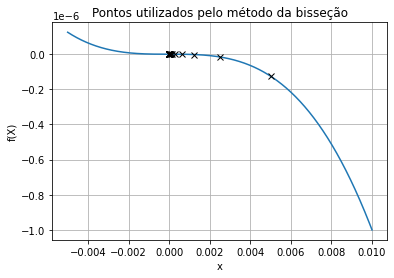

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in log10


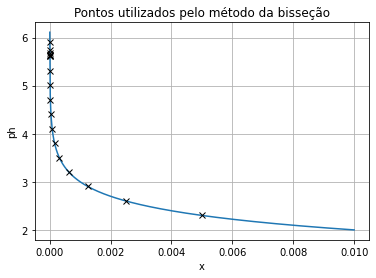

2.3460398181247712e-06

5.629664621101514

In [ ]:
[k1,k2,k3,kh,pco2]=[10**(-6.3),10**(-10.3),10**(-14),10**(-1.46),315]

#function = lambda x:x*5.474072610560535e-12 + 5.487070616723301e-22 + k3*x - x**3
function = lambda x:(x*k1*kh*pco2)/((10**6)) + (2*k2*k1*kh*pco2)/(10**6) + k3*x - x**3

bisection = bisection_method(function,10**(-12),10**(-2),True)
result = bisection.find_root(0.01,1000,0.01,0.01,'proj_2_1958')
display(result)
display(-np.log10(result))

In [154]:
result_table_part1 = pd.DataFrame(bisection.result_table).rename(columns={0:'f(x)',1:'PH de a',2:'PH de (a+b)/2',3:'PH de b'})
display(result_table_part1)
#print(result_table_part1.to_latex())

,f(x),PH de a,PH de (a+b)/2,PH de b
0,-1.867137,0.010000,0.055000,0.100000
1,-0.374824,0.010000,0.032500,0.055000
2,1.110235,0.010000,0.021250,0.032500
3,0.254798,0.021250,0.026875,0.032500
4,-0.081559,0.026875,0.029688,0.032500
5,0.080579,0.026875,0.028281,0.029688
6,-0.001910,0.028281,0.028984,0.029688
7,0.038969,0.028281,0.028633,0.028984


iteration 0

f(x_n-1): -1.2499996740373381e-07 x_n-1:0.0050000000005
f(x_n): -1.5624983697179078e-08 x_n:0.0025000000007500004
iteration 1

f(x_n-1): -1.5624983697179078e-08 x_n-1:0.0025000000007500004
f(x_n): -1.9531168456595197e-09 x_n:0.0012500000008750002
iteration 2

f(x_n-1): -1.9531168456595197e-09 x_n-1:0.0012500000008750002
f(x_n): -2.441365468772812e-10 x_n:0.0006250000009375001
iteration 3

f(x_n-1): -2.441365468772812e-10 x_n-1:0.0006250000009375001
f(x_n): -3.0515538797807756e-11 x_n:0.00031250000096875004
iteration 4

f(x_n-1): -3.0515538797807756e-11 x_n-1:0.00031250000096875004
f(x_n): -3.8136775318900374e-12 x_n:0.00015625000098437502
iteration 5

f(x_n-1): -3.8136775318900374e-12 x_n-1:0.00015625000098437502
f(x_n): -4.76327273124375e-13 x_n:7.812500099218751e-05
iteration 6

f(x_n-1): -4.76327273124375e-13 x_n-1:7.812500099218751e-05
f(x_n): -5.934969738214828e-14 x_n:3.906250099609375e-05
iteration 7

f(x_n-1): -5.934969738214828e-14 x_n-1:3.906250099609375e-05
f(x_

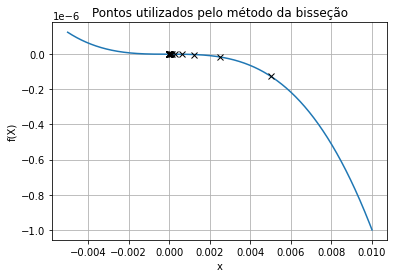

2.536774681386948e-06

5.595718105492482

In [155]:
[k1,k2,k3,kh,pco2]=[10**(-6.3),10**(-10.3),10**(-14),10**(-1.46),375]

#function = lambda x:x*5.474072610560535e-12 + 5.487070616723301e-22 + k3*x - x**3
function = lambda x:(x*k1*kh*pco2)/((10**6)) + (2*k2*k1*kh*pco2)/(10**6) + k3*x - x**3

bisection = bisection_method(function,10**(-12),10**(-2),True)
result = bisection.find_root(0.01,1000,0.01,0.01,'pro_2_2003')
display(result)
display(-np.log10(result))


In [157]:
print(bisection.result_table.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &          f(x) &    PH de a &  PH de (a+b)/2 &   PH de b \\
\midrule
0  & -1.250000e-07 &  12.000000 &       2.301030 &  2.000000 \\
1  & -1.562498e-08 &  12.000000 &       2.602060 &  2.301030 \\
2  & -1.953117e-09 &  12.000000 &       2.903090 &  2.602060 \\
3  & -2.441365e-10 &  12.000000 &       3.204120 &  2.903090 \\
4  & -3.051554e-11 &  12.000000 &       3.505150 &  3.204120 \\
5  & -3.813678e-12 &  12.000000 &       3.806180 &  3.505150 \\
6  & -4.763273e-13 &  12.000000 &       4.107210 &  3.806180 \\
7  & -5.934970e-14 &  12.000000 &       4.408240 &  4.107210 \\
8  & -7.323105e-15 &  12.000000 &       4.709270 &  4.408240 \\
9  & -8.675844e-16 &  12.000000 &       5.010300 &  4.709270 \\
10 & -8.454582e-17 &  12.000000 &       5.311330 &  5.010300 \\
11 &  1.383182e-18 &  12.000000 &       5.612360 &  5.311330 \\
12 & -2.521041e-17 &   5.612360 &       5.436269 &  5.311330 \\
13 & -8.503008e-18 &   5.612360 &       5.515450 &  5.436269 \\

#Projeto 4:

iteration 0

f(x_n-1): -1.27561884106934 x_n-1:0.044
f(x_n): 0.3699989256623013 x_n:0.026
iteration 1

f(x_n-1): 0.3699989256623013 x_n-1:0.026
f(x_n): -0.60635948641775 x_n:0.034999999999999996
iteration 2

f(x_n-1): -0.60635948641775 x_n-1:0.034999999999999996
f(x_n): -0.17027331045548344 x_n:0.0305
iteration 3

f(x_n-1): -0.17027331045548344 x_n-1:0.0305
f(x_n): 0.08431333151792941 x_n:0.028249999999999997
iteration 4

f(x_n-1): 0.08431333151792941 x_n-1:0.028249999999999997
f(x_n): -0.04649925535317134 x_n:0.029375
iteration 5

f(x_n-1): -0.04649925535317134 x_n-1:0.029375
f(x_n): 0.017985105378833133 x_n:0.028812499999999998
iteration 6

f(x_n-1): 0.017985105378833133 x_n-1:0.028812499999999998


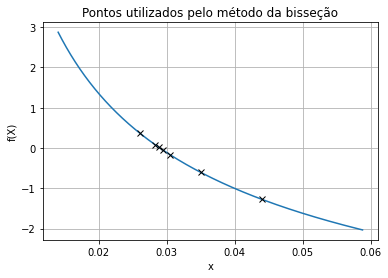

0.029093749999999998

In [168]:
re = (1.23*40*0.005)/0.0000179
function = lambda x: 1/((x)**(1/2)) +  2*np.log10(0.0000015/(3.7*0.005) +(2.51)/(( (x**(1/2))*(re) )) ) 

bisection = bisection_method(function,0.008,0.08,True)
display(bisection.find_root(0.01,100,0.03,0.03,'proj_4'))

In [169]:
bisection.result_table

,f(x),PH de a,PH de (a+b)/2,PH de b
0,0.369999,0.008000,0.026000,0.044000
1,-0.606359,0.026000,0.035000,0.044000
2,-0.170273,0.026000,0.030500,0.035000
3,0.084313,0.026000,0.028250,0.030500
4,-0.046499,0.028250,0.029375,0.030500
5,0.017985,0.028250,0.028812,0.029375
6,-0.014482,0.028812,0.029094,0.029375


In [170]:
print(bisection.result_table.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &      f(x) &   PH de a &  PH de (a+b)/2 &   PH de b \\
\midrule
0 &  0.369999 &  0.008000 &       0.026000 &  0.044000 \\
1 & -0.606359 &  0.026000 &       0.035000 &  0.044000 \\
2 & -0.170273 &  0.026000 &       0.030500 &  0.035000 \\
3 &  0.084313 &  0.026000 &       0.028250 &  0.030500 \\
4 & -0.046499 &  0.028250 &       0.029375 &  0.030500 \\
5 &  0.017985 &  0.028250 &       0.028812 &  0.029375 \\
6 & -0.014482 &  0.028812 &       0.029094 &  0.029375 \\
\bottomrule
\end{tabular}



Trying to solve project 4 problem by Newton-raphson.